In [1]:
import seaborn as sns


In [2]:
df=sns.load_dataset('diamonds')
df=df.select_dtypes(include=['float64','int64'])
df=df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df_table=df["table"]

In [4]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

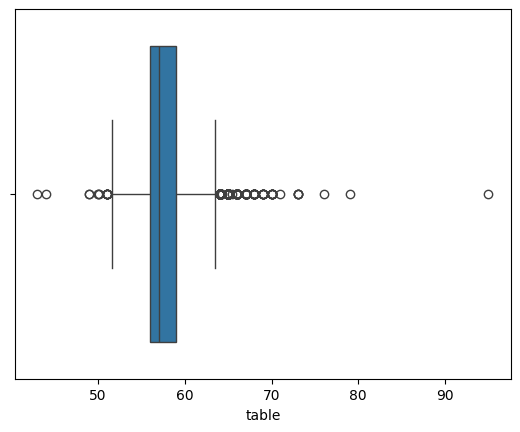

In [5]:

#aykırı değere odaklanma
sns.boxplot(x=df_table);

In [6]:
Q1=df_table.quantile(0.25)
Q3=df_table.quantile(0.75)
IQR=Q3-Q1


In [7]:
IQR

3.0

In [8]:
alt_sinir=Q1-1.5*IQR
ust_sinir=Q3+1.5*IQR

In [9]:
alt_sinir

51.5

In [10]:
ust_sinir

63.5

In [11]:
(df_table <alt_sinir) | (df_table>ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [12]:
aykiri_tf= df_table <alt_sinir

In [13]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [14]:
df_table[aykiri_tf].index

Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701, 25179,
       26387, 33586, 35633, 45798, 46040, 47630],
      dtype='int64')

In [15]:
import pandas as pd 
type(df_table)

pandas.core.series.Series

In [16]:
df_table=pd.DataFrame(df_table)

In [17]:
df_table.shape

(53940, 1)

In [18]:
import numpy as np 
from sklearn.neighbors import LocalOutlierFactor

In [19]:
clf=LocalOutlierFactor(n_neighbors=20,contamination=0.1);

In [20]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [21]:
df_scores=clf.negative_outlier_factor_

In [22]:
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [23]:
np.sort(df_scores[0:20])

array([-1.62278873, -1.59732899, -1.58352526, -1.33002541, -1.30712521,
       -1.28428162, -1.28422952, -1.28408436, -1.27351342, -1.26458706,
       -1.23611906, -1.21093135, -1.20830179, -1.17637026, -1.14305176,
       -1.13307628, -1.13060731, -1.11364018, -1.08139269, -1.08093519])

In [24]:
esik_deger=np.sort(df_scores)[13]

In [25]:
aykiri_tf=df_scores>esik_deger


In [26]:
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [27]:
yeni_df =df[df_scores>esik_deger]

AYKIRI GÖZLEMLERİN ATILMIŞ HALİ

In [28]:
yeni_df


,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


AYKIRI GÖZLEMLER 


In [29]:
df[df_scores<esik_deger]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


BASKILAMA YÖNTEMİ

In [30]:
baskı_deger=df[df_scores==esik_deger] 

In [31]:
#aykirilar=df[df_scores<esik_deger]
aykirilar=df[~aykiri_tf]

In [32]:
aykirilar.to_records(index=False)

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [33]:
res=aykirilar.to_records(index=False)

In [34]:
res[:]=baskı_deger.to_records(index=False)

In [35]:
res

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [36]:
import pandas as pd
df[~aykiri_tf]= pd.DataFrame(res, index =df[~aykiri_tf].index)

In [37]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19


EKSİK GÖZLEM ANALİZ
 SİLME YÖNTEMLERİ
    -Liste bazında silme(Listwise Method)
    -Çiftler bazında silme yöntemi(Pairwise Metod)

 Değer Atama Yöntemleri
    -Ortanca,ortalama,medyan
    -En benzer birime atama
    -dış kaynaklı atama
-Tahmine dayalı atamalar
    -Makine öprenmesi
    
    


In [38]:
import pandas as pd
import numpy as np
data = {'Q1': np.random.rand(5),
        'Q2': np.random.rand(5),
        'Q3': np.random.rand(5)}
df=pd.DataFrame(data)
df.iloc[1,0]=np.nan
df.iloc[2,2]=np.nan
df.iloc[3,1]=np.nan
df.iloc[3,2]=np.nan


In [39]:
df

,Q1,Q2,Q3
0,0.369436,0.288861,0.923867
1,NaN,0.341534,0.191618
2,0.048302,0.888462,NaN
3,0.077838,NaN,NaN
4,0.401473,0.672123,0.322737


In [40]:
df.isnull().sum()

Q1    1
Q2    1
Q3    2
dtype: int64

In [41]:
df.isnull()

,Q1,Q2,Q3
0,False,False,False
1,True,False,False
2,False,False,True
3,False,True,True
4,False,False,False


In [42]:
df[df.isnull().any(axis=1)] 
#En az bir eksik değere 
#sahip değerleri getir

,Q1,Q2,Q3
1,NaN,0.341534,0.191618
2,0.048302,0.888462,NaN
3,0.077838,NaN,NaN


In [43]:
#eksik değerlerin direkt silinmesi
df.dropna()

,Q1,Q2,Q3
0,0.369436,0.288861,0.923867
4,0.401473,0.672123,0.322737


In [44]:
#basit değer atama 
df["Q1"]

0    0.369436
1         NaN
2    0.048302
3    0.077838
4    0.401473
Name: Q1, dtype: float64

In [45]:
df["Q1"].mean()

0.22426212321394948

In [46]:
df["Q1"].fillna(df["Q1"].mean())

0    0.369436
1    0.224262
2    0.048302
3    0.077838
4    0.401473
Name: Q1, dtype: float64

In [47]:
df["Q2"].fillna(1)

0    0.288861
1    0.341534
2    0.888462
3    1.000000
4    0.672123
Name: Q2, dtype: float64

In [48]:
df=df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [49]:
df

,Q1,Q2,Q3
0,0.369436,0.288861,0.923867
1,0.224262,0.341534,0.191618
2,0.048302,0.888462,0.479407
3,0.077838,0.547745,0.479407
4,0.401473,0.672123,0.322737


Eksik Veri  Görselleştirme


In [50]:
%pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [51]:
data = {'Q1': np.random.rand(5),
        'Q2': np.random.rand(5),
        'Q3': np.random.rand(5)}
df=pd.DataFrame(data)
df.iloc[1,0]=np.nan
df.iloc[2,2]=np.nan
df.iloc[3,1]=np.nan
df.iloc[3,2]=np.nan


In [52]:
import missingno as msno


<Axes: >

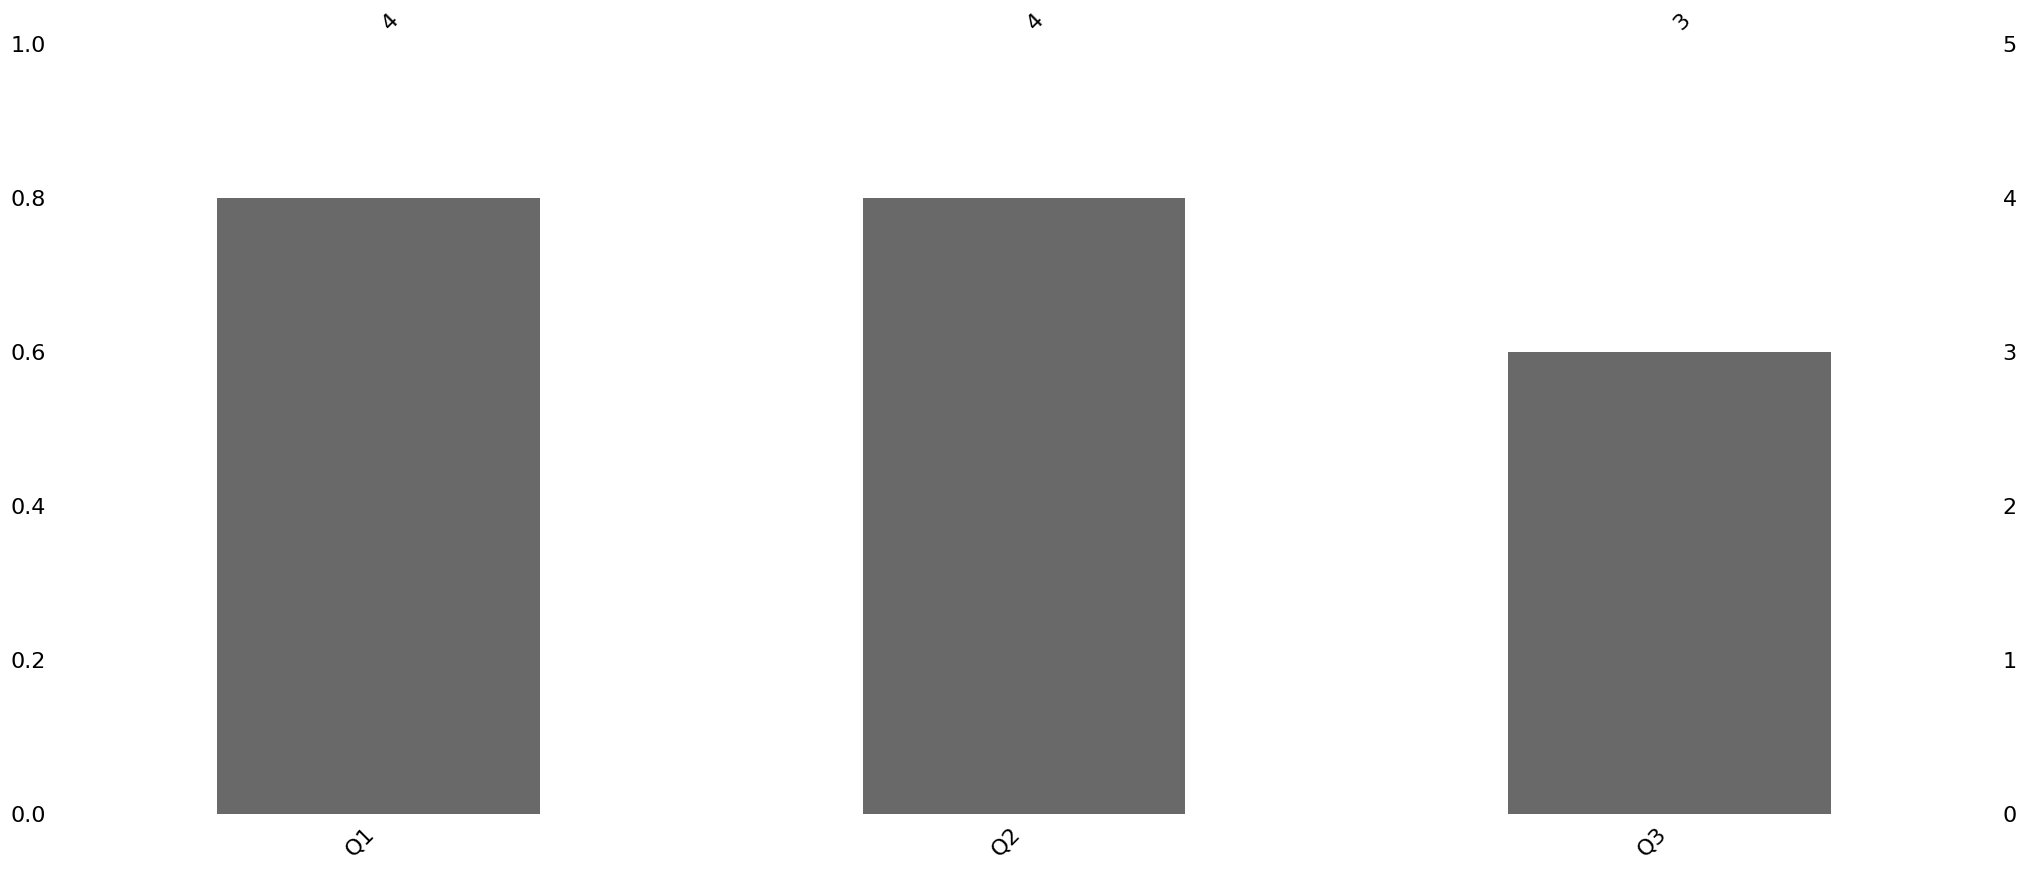

In [53]:
msno.bar(df)

<Axes: >

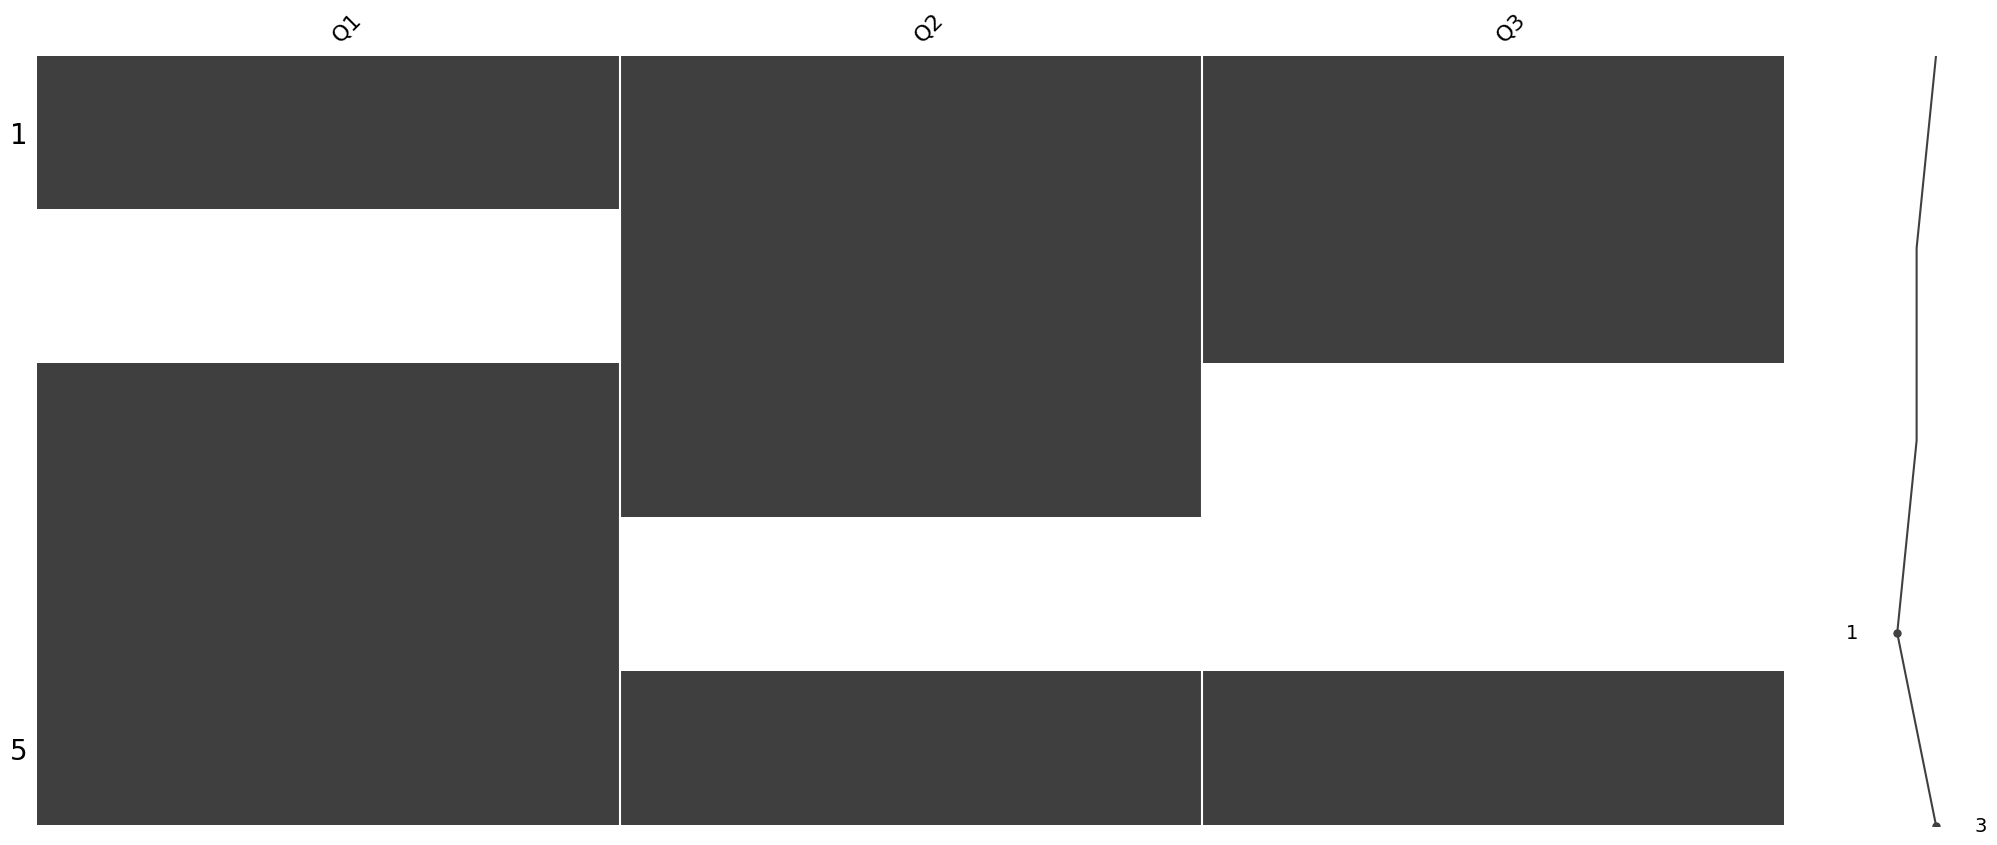

In [54]:
msno.matrix(df)

In [55]:
import seaborn as sns
df=sns.load_dataset("planets") 

In [56]:
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


<Axes: >

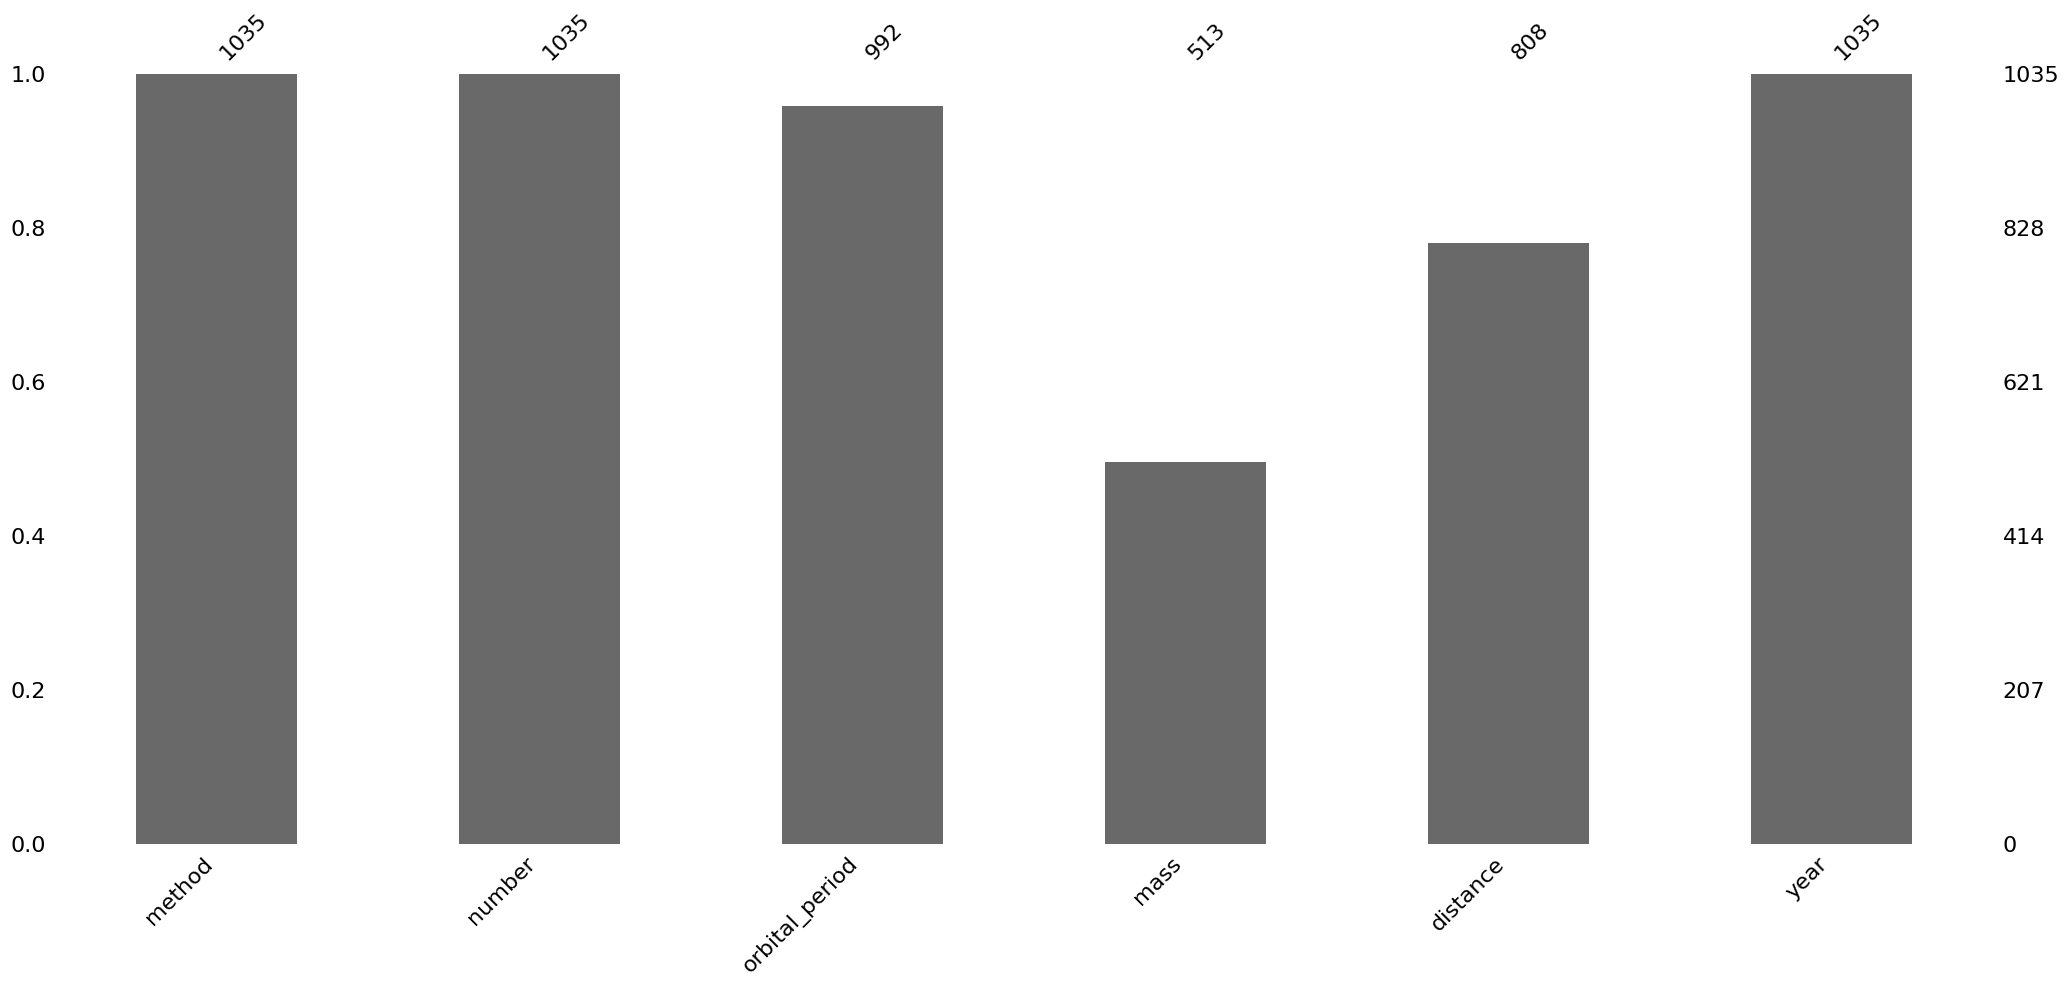

In [57]:
msno.bar(df)

In [58]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

<Axes: >

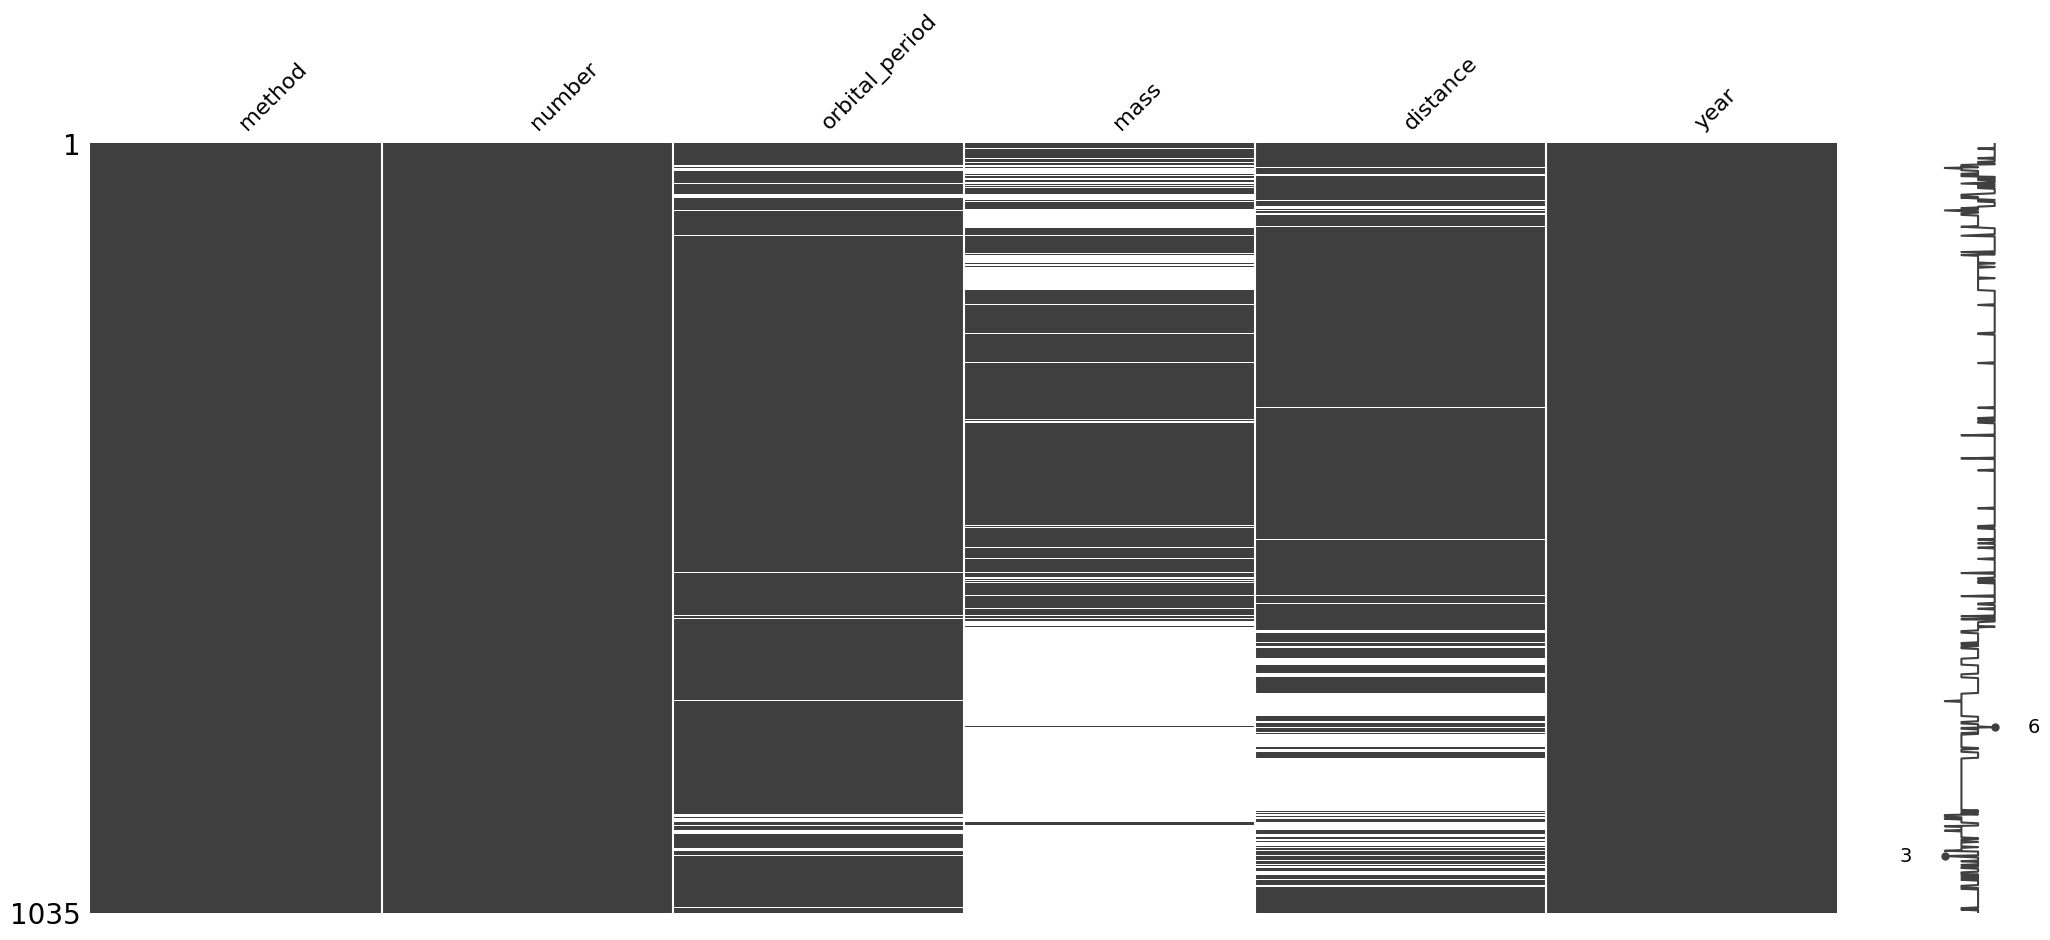

In [59]:
msno.matrix(df)

<Axes: >

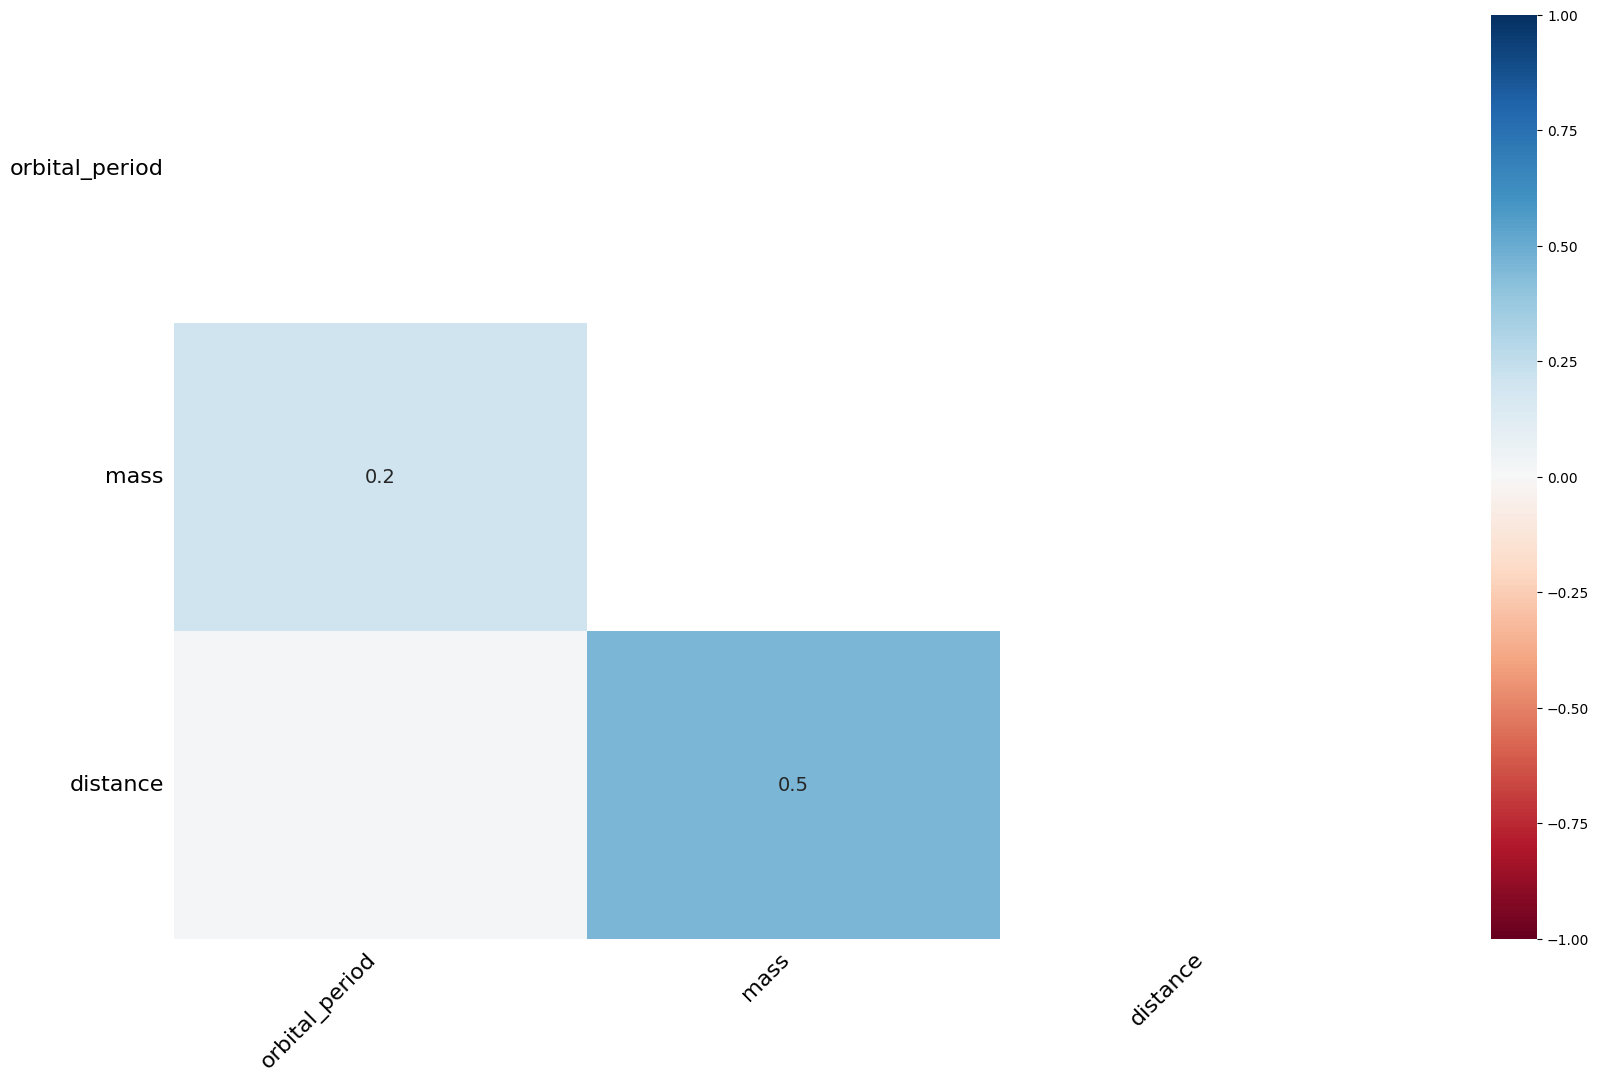

In [60]:
msno.heatmap(df)

KATEGORİK DEĞİŞKEN KIRILIMINDA DEĞER ATAMA


In [61]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2=np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3=np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"], dtype=object)

df = pd.DataFrame(
        {"maas" : V1,
         "V2":V2,
         "V3":V3,
        "departman" : V4}        
)
df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [62]:
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [63]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

In [64]:
import numpy as np
import pandas as pd 
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"], dtype=object)

df = pd.DataFrame(
        {"maas" : V1,
         
        "departman" : V4}        
)

In [65]:
df

,maas,departman
0,1.0,IT
1,3.0,IT
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [66]:
df["maas"].fillna(df["maas"].mode()[0])

0     1.0
1     3.0
2     6.0
3     1.0
4     7.0
5     1.0
6     1.0
7     9.0
8    15.0
Name: maas, dtype: float64

In [67]:
import seaborn as sns
import missingno as msno
df=sns.load_dataset('titanic')
df=df.select_dtypes(include=['float64','int64'])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [68]:
%pip install ycimpute

Note: you may need to restart the kernel to use updated packages.


In [69]:
from ycimpute.imputer import knnimput

In [70]:
var_names=list(df)

In [71]:
import numpy as np
n_df=np.array(df)

In [72]:
n_df[0:10]

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583],
       [ 0.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 0.    ,  3.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 1.    ,  3.    , 27.    ,  0.    ,  2.    , 11.1333],
       [ 1.    ,  2.    , 14.    ,  1.    ,  0.    , 30.0708]])

In [73]:
n_df.shape

(891, 6)

In [74]:
dff=knnimput.KNN(k=4).complete(n_df)

Imputing row 1/891 with 0 missing, elapsed time: 0.099
Imputing row 101/891 with 0 missing, elapsed time: 0.100
Imputing row 201/891 with 0 missing, elapsed time: 0.102
Imputing row 301/891 with 1 missing, elapsed time: 0.103
Imputing row 401/891 with 0 missing, elapsed time: 0.103
Imputing row 501/891 with 0 missing, elapsed time: 0.104
Imputing row 601/891 with 0 missing, elapsed time: 0.104
Imputing row 701/891 with 0 missing, elapsed time: 0.105
Imputing row 801/891 with 0 missing, elapsed time: 0.105


In [75]:
type(dff)

numpy.ndarray

In [76]:
import pandas as pd
dff=pd.DataFrame(dff, columns=var_names)

In [77]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [78]:
#random forest
import seaborn as sns
import missingno as msno
df=sns.load_dataset('titanic')
df=df.select_dtypes(include=['float64','int64'])
print(df.head())



   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


In [79]:
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [80]:
var_names=list(df)

In [81]:
import numpy as np
n_df=np.array(df)

DEĞİŞKEN DÖNÜŞÜMLERİ


In [82]:
import seaborn as sns
df=sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2



0-1 DÖNÜŞÜMÜ

In [83]:
from sklearn.preprocessing import LabelEncoder
lbe=LabelEncoder()
lbe.fit_transform(df["sex"])
df["yeni_sex"]=lbe.fit_transform(df["sex"])
df

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


NORMALİZASYON

In [86]:
from sklearn import preprocessing
preprocessing.scale(df)

ValueError: could not convert string to float: 'Female'